In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
import glob
descriptors_folder = 'Descriptores-cuts/'

npys = []
for file in glob.glob(descriptors_folder+'*.npy'):
    if not '_st' in file:
        x = np.load(file)
        npys.append(x)
        
X = np.hstack(npys).T
np.savetxt("descriptors.csv", X, fmt="%.4f", delimiter=',')

In [4]:
X_norm = X - X.mean(0) 
X_norm = X_norm / X_norm.std(0)

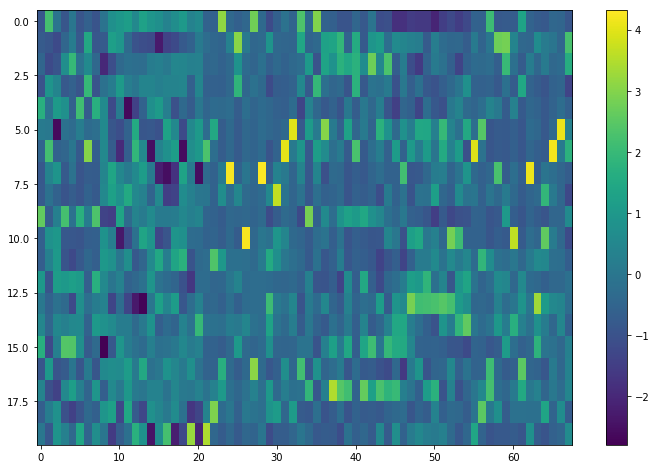

In [5]:
plt.figure(figsize=(12,8))
plt.imshow(X_norm,aspect='auto')
plt.colorbar()

In [6]:
from sklearn.cluster import  KMeans
km = KMeans(4)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
Y = pca.fit_transform(X)
plt.figure(figsize=(12,6))
plt.scatter(Y[:,0],Y[:,1],c=km.labels_,cmap=plt.cm.Set1, s = 100);

In [34]:
import librosa
sounds = []
stfts = []
for filename in glob.glob('Cuts/*.wav'):
    x,fs = librosa.load(filename, sr = None)
    x = x[:245]
    n_fft= int(fs*0.06)
    stft_ = librosa.stft(x,n_fft=n_fft,hop_length=n_fft )
    stfts.append(stft_.T)
    sounds.append(x)
    
S = np.vstack(sounds)
F = np.fft.fft(S)

F = F[:int(S.shape[1]/2)]
# plt.imshow(abs(F),aspect='auto',norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=0.0, vmax=1000.0))

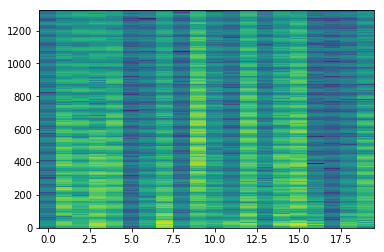

In [49]:
S = np.vstack(stfts)
#np.savetxt("stfts.csv", S, delimiter=',')
#np.savetxt('stfts.txt', S.view(float).reshape(-1, 2))
np.savetxt('stfts.txt', S.view(float).reshape(-1, 20).T, delimiter=',')
plt.imshow(np.log10(abs(S)).T,origin='bottom',aspect='auto')

In [36]:
S.shape

(20, 1324)

In [19]:
X.shape

(20, 68)

In [52]:
j = np.load(r'C:\Users\user\Documents\GitHub\Tesis\Descriptores-cuts\Multiphonic.wav.npy')
np.savetxt('prueba.txt', j, delimiter=',')